/var/folders/jj/9j0c_6196zx24tx5jb3ngnym0000gn/T/ipykernel_62729/358289172.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, interval = interval, period = PERIOD)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,12_ema,27_ema,MACD,Signal,MACD_HIST,BB_SMA,BB_STD,Upper Band,Lower Band,MACD_Strategy,BB_Strategy,Confl_Strategy,Strategy,asset_cum_returns,strategy_cum_returns
105,15.864000,15.891001,15.563001,15.839510,9753179,15.758339,15.678557,0.079782,0.079761,0.000021,15.568483,0.464093,16.496669,14.640296,NaN,NaN,NaN,0,NaN,NaN
106,15.691500,15.868990,15.613009,15.864500,4540306,15.747739,15.679728,0.068010,0.077389,-0.009379,15.620515,0.411109,16.442734,14.798296,1.0,0.0,1.0,0,-0.010874,0.000000
107,15.861780,15.894000,15.675000,15.686999,3654618,15.765740,15.695899,0.069840,0.075868,-0.006028,15.676604,0.357713,16.392029,14.961178,-1.0,0.0,-1.0,0,-0.000140,0.000000
108,15.867999,15.910001,15.775000,15.862000,3756730,15.781817,15.710925,0.070892,0.074867,-0.003975,15.725703,0.307329,16.340362,15.111045,-1.0,0.0,-1.0,0,0.000252,0.000000
109,15.830999,15.885010,15.811000,15.866000,2559792,15.789523,15.721244,0.068279,0.073543,-0.005264,15.770378,0.245430,16.261238,15.279519,-1.0,0.0,-1.0,0,-0.002080,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,190.035004,190.681793,189.339996,189.979996,12795289,188.718934,190.210414,-1.491480,-1.577485,0.086005,190.112511,3.243846,196.600203,183.624819,-1.0,0.0,-1.0,0,10.979009,0.019302
5082,189.199997,190.279999,188.630005,190.039993,11150771,188.792944,190.138242,-1.345298,-1.531048,0.185750,189.873756,3.117871,196.109497,183.638015,1.0,0.0,1.0,0,10.926374,0.019302
5083,189.960007,190.020004,188.399994,189.190002,10931312,188.972492,190.125511,-1.153019,-1.455442,0.302423,189.666506,2.955336,195.577178,183.755834,1.0,0.0,1.0,0,10.974282,0.019302
5084,190.100006,191.009995,189.750000,189.979996,11899532,189.145956,190.123689,-0.977733,-1.359900,0.382167,189.510007,2.837214,195.184434,183.835580,1.0,0.0,1.0,0,10.983107,0.019302


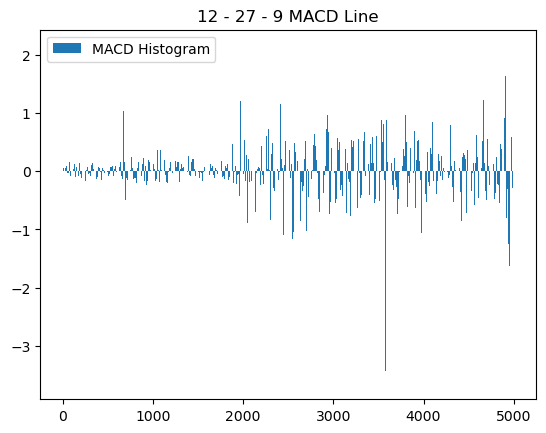

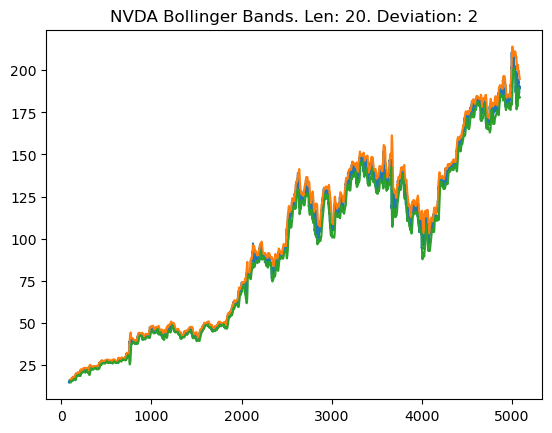

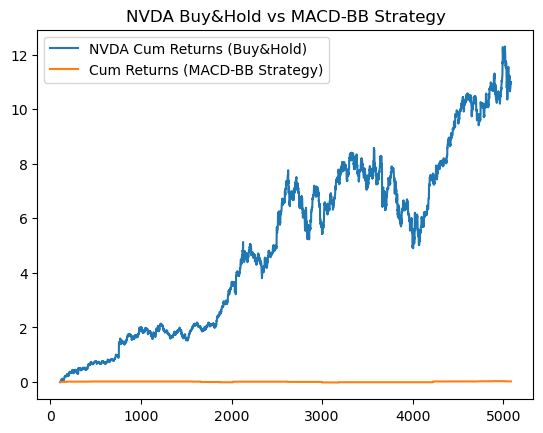

In [1]:
import numpy as np 
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Ticker
TICKER = "NVDA"

# Step 2: Price Behavior 
INTERVAL = "1h"
if INTERVAL == "1h":
    PERIOD = "730d"
else:
    PERIOD = "max"
    # Wrong Belief: different intervals yield different price beheavior, but 
    # the stochastic nature of share prices is fixed among all time intervals

# Step 3: MACD
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9

# Step 4: BB
BB_LENGTH = 20
STD_DEV = 2

# Step 5: Data Subsection
LOOKBACK = 5000

def get_data(ticker = TICKER, interval = INTERVAL, lookback = LOOKBACK):
    
    # Step 1: Download Data
    df = yf.download(ticker, interval = interval, period = PERIOD)

    # Step 2: Select only Level 1 from Multilevel Column (MultiIndex)
    df.columns = df.columns.get_level_values(0)

    # Step 3: Simplifying df for Plots
    df = df.reset_index(drop=True)

    # Step 4: Return Subsect Data 
    return df.iloc[-lookback:, :]

def add_MACD(df, fast = MACD_FAST, slow = MACD_SLOW, span = MACD_SPAN):

    # Step 1: Fast and Slow EMA Columns
    df[f"{fast}_ema"] = df["Close"].ewm(span = fast).mean()
    df[f"{slow}_ema"] = df["Close"].ewm(span = slow).mean()

    # Step 2: MACD Column (= Difference betwenn fast and slow ema)
    df["MACD"] = df[f"{fast}_ema"] - df[f"{slow}_ema"]

    # Step 3: MACD Signal (= Span Period)
    df["Signal"] = df[f"MACD"].ewm(span = span).mean()

    # Step 4: MACD Hist
    df["MACD_HIST"] = df[f"MACD"] - df["Signal"]

    # Step 5: Plot Histogram
    plt.figure()
    plt.bar(x=range(len(df)), height=df["MACD_HIST"])
        # Every Bar = Every Date in the Index
        # Direction: Bar (>0) --> Bullish vs. Bar (<0) --> Bearish
        # Strength: Bar (Tall) --> Strong Momentum vs. Bar (Short) --> Weak Momentum
    plt.title(f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Line")
    plt.legend(["MACD Histogram"])

    return df

def add_bollinger_bands(df, std_dev = STD_DEV, length = BB_LENGTH):
        
    # Step 1: Build the BB Columns
    df["BB_SMA"] = df["Close"].rolling(window=length).mean()
        # It calculates the middle Bend
        # rolling(window=length): it takes the Close price and creates a moving window of length periods
        # mean(): it calculates the average price within that window at each step
    df["BB_STD"] = df["Close"].rolling(window=length).std()
        # std. dev/volatility: quantifies how spread out/ inconsistent your data is. 
        # It measures the average distance of each data point from the mean of the entire set
    df["Upper Band"] = df["BB_SMA"] + (std_dev * df["BB_STD"])
        # It takes the middle band's value and adds the volatility * std_dev factor (typically 2). 
        # This places the upper line 2 std_dev above the middle band.
    df["Lower Band"] = df["BB_SMA"] - (std_dev * df["BB_STD"])
        
    # Step 2: Plot the BB
    plt.figure()
    plt.plot(df["Close"]) # Blue
    plt.plot(df["Upper Band"]) # Orange
    plt.plot(df["Lower Band"]) # Green
    plt.title(f"{TICKER} Bollinger Bands. Len: {BB_LENGTH}. Deviation: {STD_DEV}")

    return df.dropna()
    # Drop na, since it takes us 20 days to get the first rollings average values 

def add_MACD_strategy(df): 

    # Step 1: Long when Bullish Momentum, Short for Bearish Momentum
    df["MACD_Strategy"] = np.where(df["MACD_HIST"] > 0, 1, -1)

    # Step 2: Shift the signal to prevent lookahead bias - we can only understand Data after it happens:
    df["MACD_Strategy"] = df["MACD_Strategy"].shift(1)
    
    return df

def add_BB_strategy(df):
    df["BB_Strategy"] = np.where(df["Close"] > df["Upper Band"], -1, 
                    np.where(df["Close"] < df["Lower Band"], 1, 0))
    # Short Signal: -1 (Close > Upper Band) --> Multilple Leverage: -3
    # Long Signal: 1 (Close < Lower Band) --> Multilple Leverage: 3
    # Hold Signal: 0 (Close not > Upper Band, nor < Lower Band)

    # Shift the signal to prevent lookahead bias - we can only understand Data after it happens:
    df["BB_Strategy"] = df["BB_Strategy"].shift(1)
    
    return df 

def add_confluence_strategy(df):
    
    # Step 1: Place trades, when those agree with each other/there is a confluence
    df["Confl_Strategy"] = df["MACD_Strategy"] + df["BB_Strategy"]

    # Adjust for Simplicity
    df["Strategy"] = np.where(df["Confl_Strategy"] == 2, 1,
                    np.where(df["Confl_Strategy"] == -2, -1, 0))

    return df 

def test_strategy(df):
    
    # Step 1: Test Strategy 
    df["asset_cum_returns"] = (1 + df["Close"].pct_change()).cumprod() - 1 
    df["strategy_cum_returns"] = (1 + df["Close"].pct_change() * df["Strategy"]).cumprod() - 1

    # Step 2: Plot Returns
    plt.figure()
    plt.plot(df["asset_cum_returns"])
    plt.plot(df["strategy_cum_returns"])
    plt.legend([f"{TICKER} Cum Returns (Buy&Hold)", "Cum Returns (MACD-BB Strategy)"])
    plt.title(f"{TICKER} Buy&Hold vs MACD-BB Strategy")
    # In this graph we can recognize the compunding effect 

    return df 

def main():
    df = get_data()
    df = add_MACD(df)
    df = add_bollinger_bands(df)
    df = add_MACD_strategy(df)
    df = add_BB_strategy(df)
    df = add_confluence_strategy(df)
    df = test_strategy(df)

    return df


df = main()
df


In [2]:
# Testing Values
df["MACD_Strategy"].value_counts()

MACD_Strategy
-1.0    2524
 1.0    2456
Name: count, dtype: int64

In [3]:
# Testing Values
df["BB_Strategy"].value_counts()

BB_Strategy
 0.0    4446
-1.0     289
 1.0     245
Name: count, dtype: int64

In [4]:
# Testing Values
df["Confl_Strategy"].value_counts()

Confl_Strategy
-1.0    2271
 1.0    2175
 0.0     518
-2.0      12
 2.0       4
Name: count, dtype: int64

In [5]:
df["Strategy"].value_counts()

Strategy
 0    4965
-1      12
 1       4
Name: count, dtype: int64